### Usage:

The purpose of this notebook is to help as have a glance at our data. We contruct the network based on the data given, we analyse the components we have

#### Importing Libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### Loading the Dataset into a csv file

In [2]:
data_file = 'top_1000_by_liquidity.csv'
dataset_full = pd.read_csv(data_file)

In [3]:
dataset_full.columns

Index(['id', 'reserve0', 'reserve1', 'totalSupply', 'reserveUSD', 'reserveETH',
       'volumeToken0', 'volumeToken1', 'txCount', 'createdAtTimestamp',
       'createdAtBlockNumber', 'token0.id', 'token0.symbol', 'token0.name',
       'token0.txCount', 'token0.tradeVolume', 'token0.totalLiquidity',
       'token0.decimals', 'token1.id', 'token1.symbol', 'token1.name',
       'token1.txCount', 'token1.tradeVolume', 'token1.totalLiquidity',
       'token1.decimals'],
      dtype='object')

#### Checking the subset of the Input Graph

In [4]:
dataset_cropped = dataset_full[['token0.symbol', 'token1.symbol', 'reserveUSD']]
dataset_cropped

,token0.symbol,token1.symbol,reserveUSD
0,UETH,ULCK,1.743372e+09
1,WISE,WETH,1.160742e+08
2,USDC,WETH,9.728135e+07
3,DAI,USDC,3.533727e+07
4,WETH,USDT,3.524678e+07
...,...,...,...
995,API3,WETH,1.289500e+05
996,PATH,WETH,1.285439e+05
997,FARM,WETH,1.285344e+05
998,WETH,CURRY,1.284891e+05


#### Loading the csv file into a Graph object

In [6]:
def build_graph():
    """Build a graph from the 'top_1000_by_liquidity.csv' file, but without the weights since we want to calculate the nestedness.

    :returns: The built network
    :rtype: nx.Graph
    """
    df = pd.read_csv('top_1000_by_liquidity.csv')
    edges = pd.DataFrame(
    {
        "source": df["token0.symbol"],
        "target": df["token1.symbol"]
    }
    )
    G = nx.from_pandas_edgelist(edges, create_using=nx.Graph().to_undirected())
    return G

network = build_graph()

#### Plotting the Graph as a whole

In [25]:
def draw_graph_spring(G, with_labels=False):
    """ Draw Graph Spring

    The function plots the graph with the spring layout
    :param G: the input network
    :param with_labels: flag to determine if the plot would have labels or not
    :return: matplotlib.pyplot object rendering the plot of the graph
    """
    fig, ax = plt.subplots(figsize=(25,20)) 
    plt.title("UniSwap token pair liquidity")
    nx.draw_spring(G, with_labels=with_labels, node_size=5, width=1)
    #fig.savefig("largest_component.pdf", format="pdf")


def draw_graph_shell(G, with_labels=False):
    """ Draw Graph Shell

    The function plots the graph with the spring layout
    :param G: the input network
    :param with_labels: flag to determine if the plot would have labels or not
    :return: matplotlib.pyplot object rendering the plot of the graph
    """
    fig, ax = plt.subplots(figsize=(25,20)) 
    plt.title("UniSwap token pair liquidity")
    nx.draw_shell(G, with_labels=with_labels, node_size=5, width=0.07)
    #fig.savefig("_shell.pdf", format="pdf")

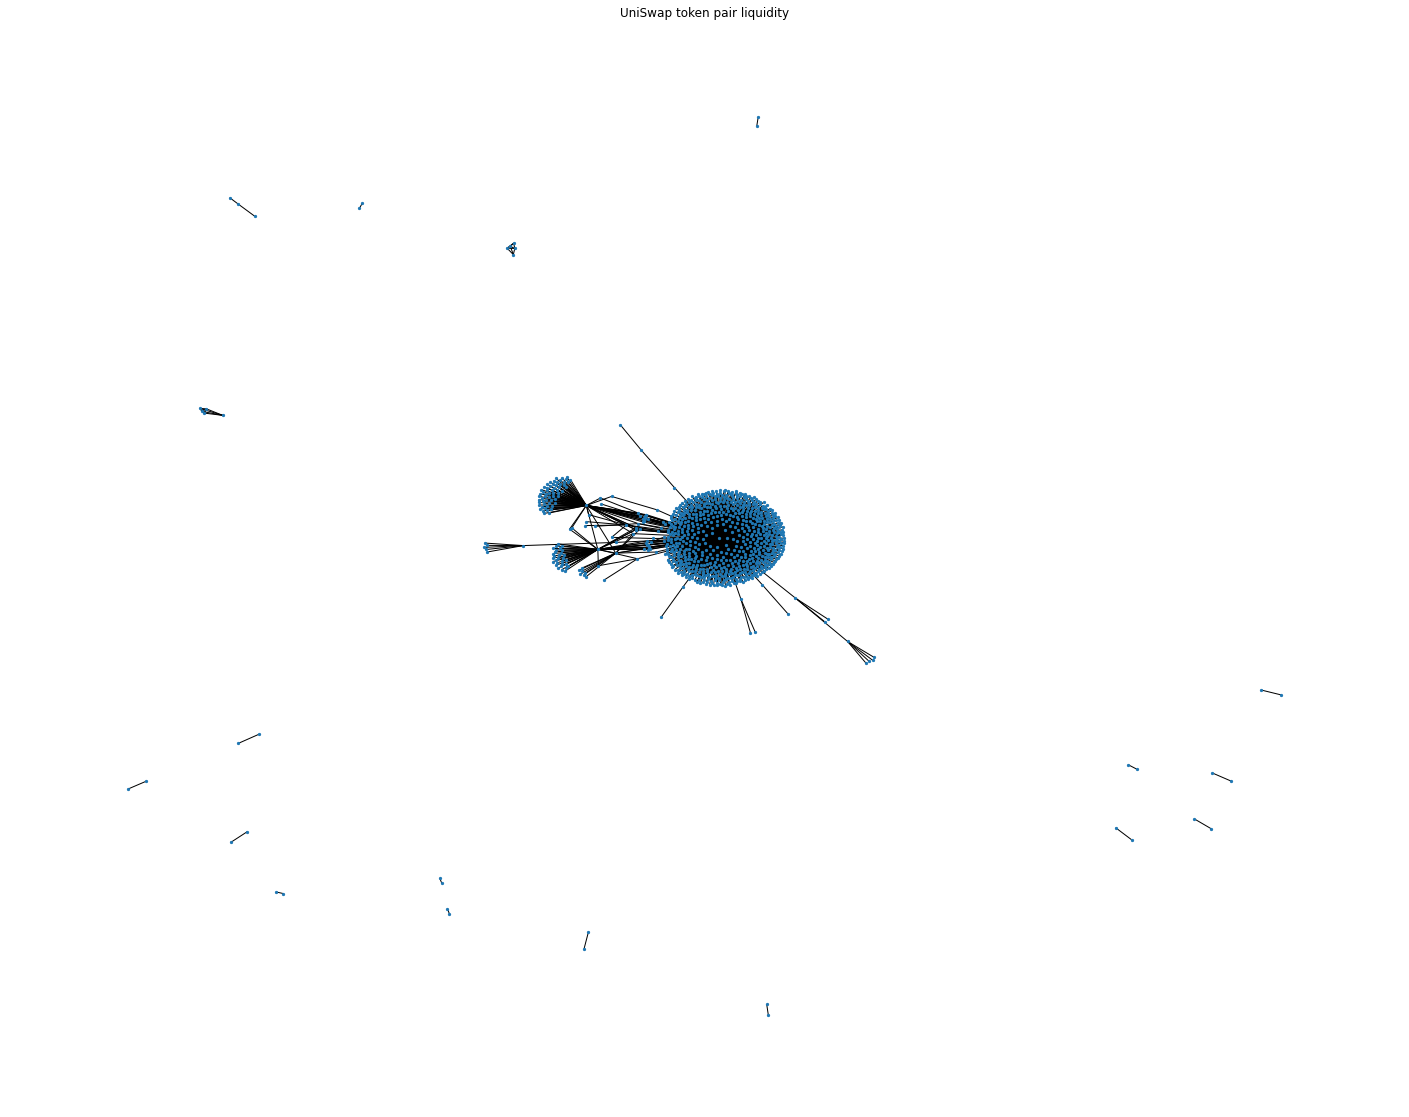

In [26]:
draw_graph_spring(network)


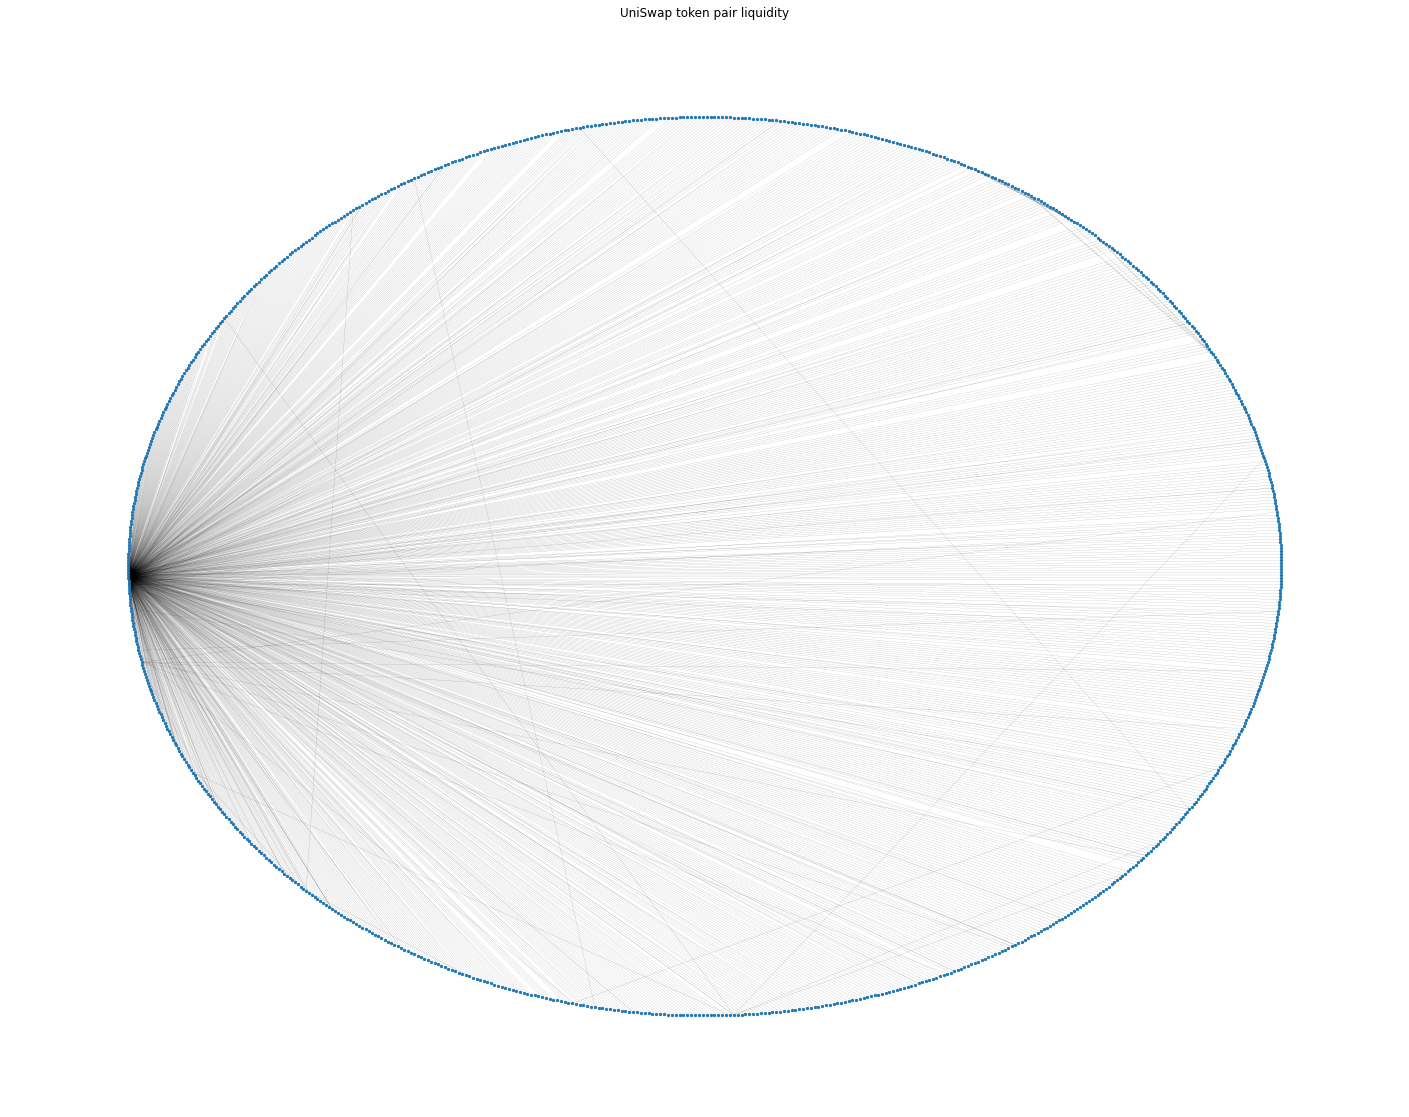

In [29]:
draw_graph_shell(network)

### Exploratory Data Analysis

#### Statistics of the total number of subgraphs and their plots

In [16]:
total_subgraphs = list(network.subgraph(c) for c in nx.connected_components(network))

In [17]:
print(f"The total number of sub-graphs for this network is: {len(total_subgraphs)}")

The total number of sub-graphs for this network is: 19


In [18]:
def compute_nodes_and_edges(graph, list_iter, statistics_pdf):
    """ Compute nodes and edges

    This function computes the total number of nodes and edges that an input graph has
    :param statistics_pdf: pandas DataFrame containing the statistics of the graph
    :param list_iter: The number of the iterator to create a name for the subgraph
    :param graph: networkx graph object
    :return: Dataframe entry with the statistics of the graph
    """

    nodes = len(list(graph.nodes()))
    edges = len(list(graph.edges()))
    subgraph_name = f'subgraph_{list_iter}'

    subset_pdf = pd.DataFrame([[subgraph_name, nodes, edges]], columns=['subgraph', 'nodes', 'edges'])

    statistics_pdf = pd.concat([statistics_pdf, subset_pdf])

    return statistics_pdf

def compute_nodes_and_edges_names(graph, list_iter, statistics_pdf):
    """ Compute nodes and edges names

    This function computes the names of nodes and edges that an input graph has
    :param statistics_pdf: pandas DataFrame containing the statistics of the graph
    :param list_iter: The number of the iterator to create a name for the subgraph
    :param graph: networkx graph object
    :return: Dataframe entry with the statistics of the graph
    """

    nodes = list(graph.nodes())
    edges = list(graph.edges())
    subgraph_name = f'subgraph_{list_iter}'

    subset_pdf = pd.DataFrame([[subgraph_name, nodes, edges]], columns=['subgraph', 'nodes', 'edges'])

    statistics_pdf = pd.concat([statistics_pdf, subset_pdf])

    return statistics_pdf


In [19]:
sorted_subgraph_list = sorted(total_subgraphs, key=len, reverse=True)
subgraph_statistics_pdf = pd.DataFrame(columns=['subgraph', 'edges', 'nodes'])

for idx, subgraph in enumerate(sorted_subgraph_list):
    subgraph_statistics_pdf = compute_nodes_and_edges(subgraph, idx, subgraph_statistics_pdf)

subgraph_statistics_pdf

,subgraph,edges,nodes
0,subgraph_0,947,891
0,subgraph_1,9,5
0,subgraph_2,10,5
0,subgraph_3,2,3
0,subgraph_4,1,2
0,subgraph_5,1,2
0,subgraph_6,1,2
0,subgraph_7,1,2
0,subgraph_8,1,2
0,subgraph_9,1,2


#### Plots of the largest and the smallest components

In [20]:
largest_subgraph = sorted_subgraph_list[0]

assert len(list(largest_subgraph.nodes())) == 891, f'The selected graph is not the largest subgraph'

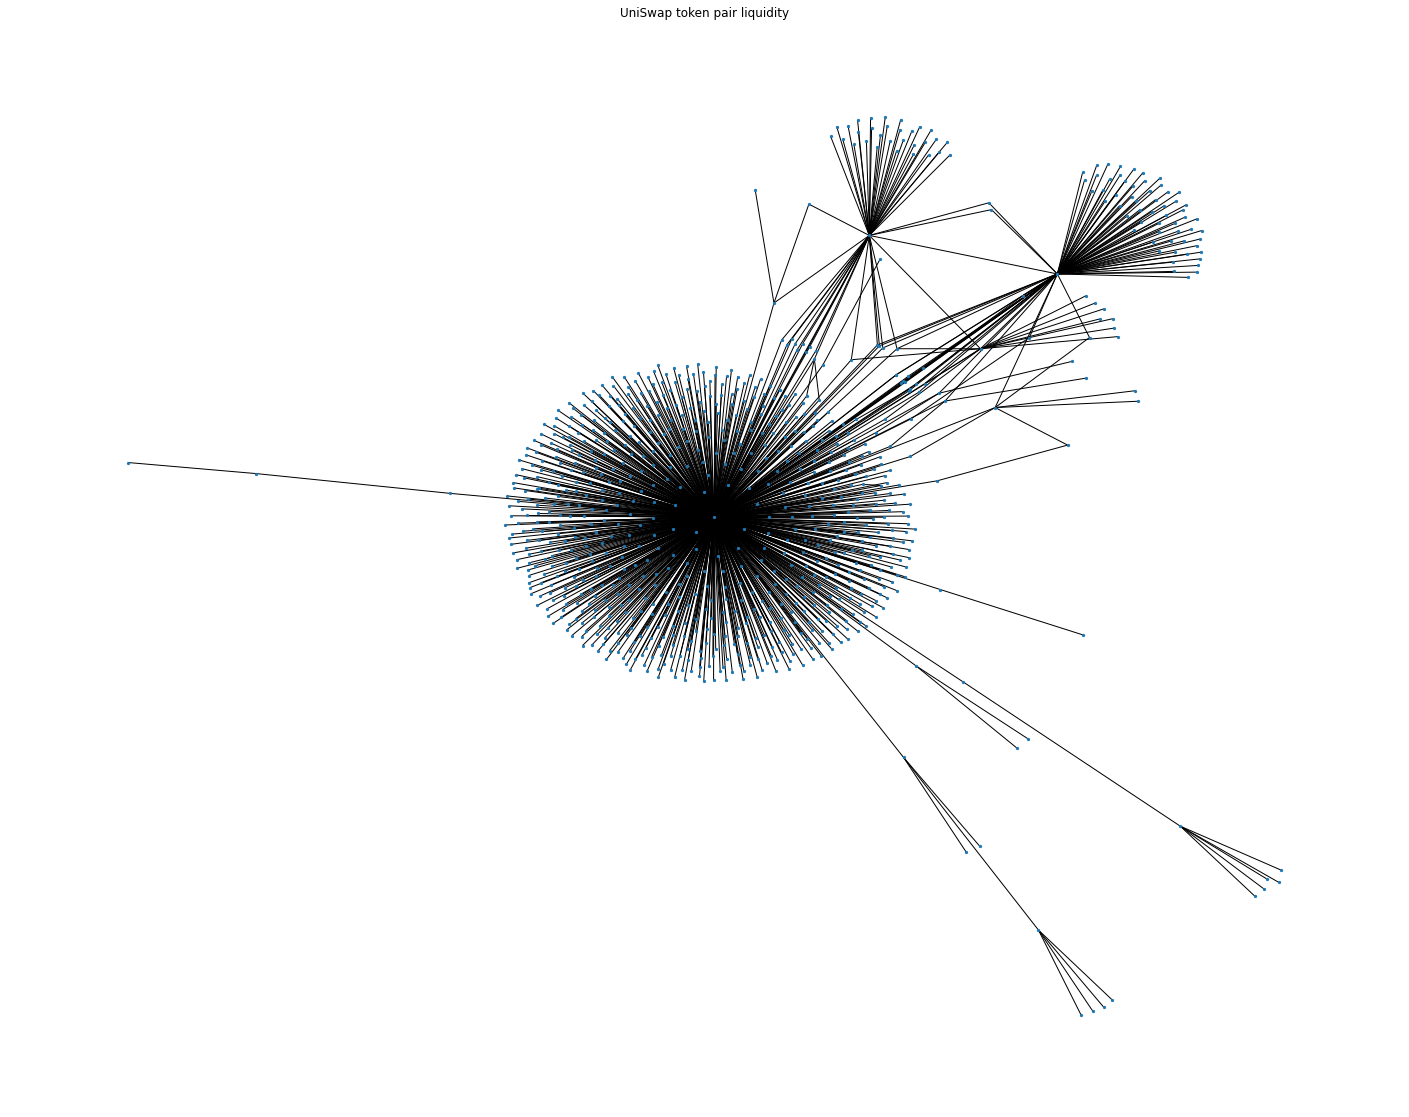

In [24]:
draw_graph_spring(largest_subgraph)

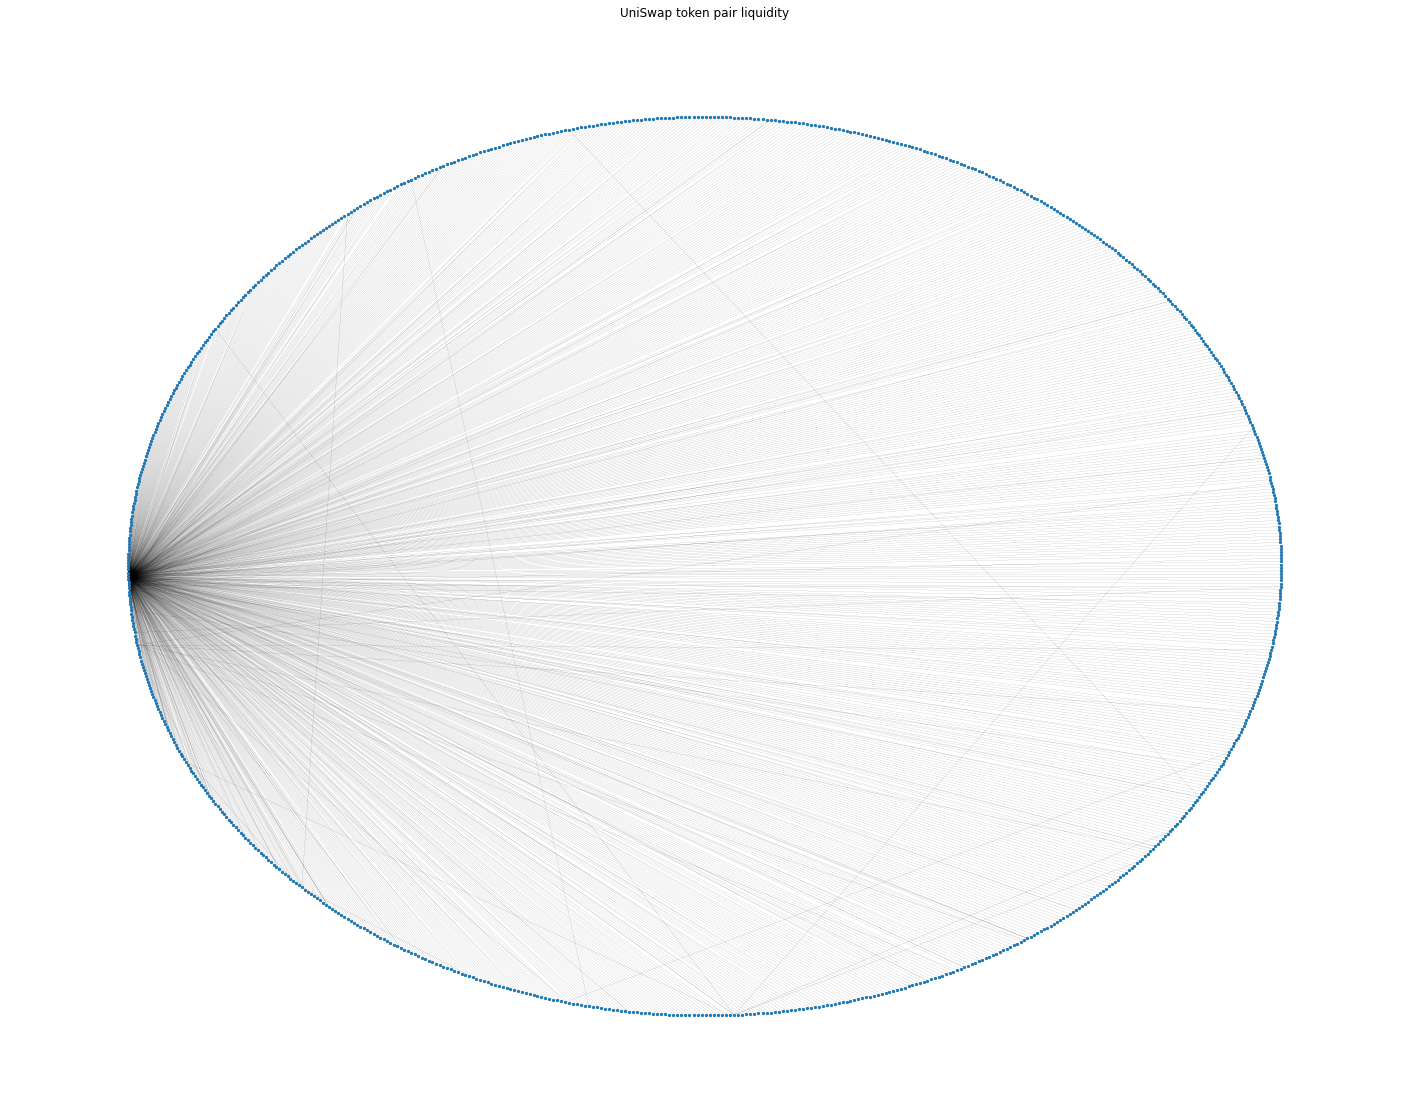

In [28]:
draw_graph_shell(largest_subgraph)

In [30]:
smallest_subgraphs = sorted_subgraph_list[3:]

#### Getting the node lists for the smallest subgraphs as the plots will only have 2 nodes

In [31]:
smallest_subgraphs = sorted_subgraph_list[3:]
smallest_subgraphs_node_names_pdf = pd.DataFrame(columns=['subgraph', 'edges', 'nodes'])

for idx, subgraph in enumerate(smallest_subgraphs):
    smallest_subgraphs_node_names_pdf = compute_nodes_and_edges_names(subgraph, idx, smallest_subgraphs_node_names_pdf)

smallest_subgraphs_node_names_pdf

,subgraph,edges,nodes
0,subgraph_0,"[(MIA, HANU), (HANU, GOJ)]","[MIA, HANU, GOJ]"
0,subgraph_1,"[(TRIBE, FEI)]","[TRIBE, FEI]"
0,subgraph_2,"[(BLUE, DBL)]","[BLUE, DBL]"
0,subgraph_3,"[(CAPg, CAPC)]","[CAPg, CAPC]"
0,subgraph_4,"[(CBTC, FREE)]","[CBTC, FREE]"
0,subgraph_5,"[(WUMI, ISP)]","[WUMI, ISP]"
0,subgraph_6,"[(EYE, SCX)]","[EYE, SCX]"
0,subgraph_7,"[(UST, MIR)]","[UST, MIR]"
0,subgraph_8,"[(BEE, BTB)]","[BEE, BTB]"
0,subgraph_9,"[(FOM, RON)]","[FOM, RON]"


#### Fetching the dates of the earliest and the latest transaction in the UniSwap Dataset

In [32]:
dataset_timestamps = dataset_full[['createdAtTimestamp']].values

In [33]:
dataset_timestamps_datetimes = [datetime.datetime.fromtimestamp(dataset_timestamp[0]) for dataset_timestamp in dataset_timestamps]

In [34]:
print(f'The earliest date on which there was a transaction is: {str(min(dataset_timestamps_datetimes))},\n and the latest date on which there was a transaction is: {str(max(dataset_timestamps_datetimes))}')

The earliest date on which there was a transaction is: 2020-05-05 22:22:25,
 and the latest date on which there was a transaction is: 2022-11-03 00:05:23
